In [2]:
#carregar packages Python
import networkx as nx #biblioteca para o estudo de grafos  
import pandas as pd
import numpy as np
import scipy as sc
import random
import matplotlib.pyplot as plt
%matplotlib notebook 

#carregar dataset original 
G_df = pd.read_csv('lesmiserables.txt', delim_whitespace=True, header=None, names=['source', 'target', 'weight'])

#criação do grafo original - "G"
G = nx.from_pandas_edgelist(G_df, 'source', 'target', edge_attr='weight')


#carregar dataset com os pesos invertidos
GPI_df = pd.read_csv('c:\lesmiserablespi.csv', sep=";", header=None, names=['source', 'target', 'weight'])

#criação do grafo com os pesos invertidos - "GPI" 
GPI = nx.from_pandas_edgelist(GPI_df, 'source', 'target', edge_attr='weight')

#criação da função que calcula o diâmetro do grafo GPI
def diametro(GPI):  
    L = [] #criação uma lista vazia
    nodes = nx.nodes(GPI) #criação de uma lista com todos os vértices do grafo
    for i in (nodes):
        #criação de um dicionário para o vértice i ("keys"-vértices, "values"-caminhos curtos entre i e cada vértice)
        length,path = nx.single_source_dijkstra(GPI, i, target=None, cutoff=None, weight='weight')
        #identificação do caminho curto mais longo
        max_length_value = max(length.values())
        #o caminho curto mais longo associado ao vértice i é guardado na lista L
        L.append(max_length_value)
    #o diâmetro do grafo corresponde ao valor máximo guardado na lista L
    return max(L)

#criação de um dicionário para o grafo G: as "keys" são os vértices, os "values" são os respetivos graus ponderados 
dct_node_degree = {}
total_vert = len(nx.nodes(G))
for i in range(total_vert):
    value_gp = G.degree(i,weight='weight')
    dct_node_degree[i] = value_gp

#criação da função que cclcula o máximo grau ponderado
def grau_max(G):
    temp = 0 #criação de uma variável onde será guardado o maior grau ponderado
    nodes = nx.nodes(G) #criação de uma lista com todos os vértices do grafo
    for i in (nodes):
        if dct_node_degree[i] > temp:
            temp = dct_node_degree[i]
            novo_i = i
    return novo_i , temp


#cálculo do diâmetro inicial do grafo GPI (com recurso à função diametro(GF))
diam_atual = diametro(GPI)
print("Diâmetro atual do grafo GPI:", diam_atual)
#identificação do vértice inicial com máximo grau ponderado no grafo F (com recurso à função grau_max(G))
novo_i, temp = grau_max(G)
print("Máximo grau ponderado inicial no grafo G:",temp,"Vértice:",novo_i)


#input diâmetro target
print("Introduzir novo diâmetro a atingir no grafo GPI:")
diam_target = int(input())


#remoção de vértices até se atingir o diâmetro target
while diam_atual > diam_target:
    #eliminação do vértice com máximo grau ponderado: sim ou não?
    dec = random.choice([True, False])
    #se a decisão for positiva, remoção do vértice com máximo grau ponderado
    #print(dec)
    if dec == True:
        novo_i,temp = grau_max(G)
        G.remove_node(novo_i)
        GPI.remove_node(novo_i)
        dct_node_degree = G.degree(weight='weight')
        diam_atual =  diametro(GPI)
        #se a decisão for negativa, remoção de um vértice aleatório
    else:
        nodes = nx.nodes(G)
        L_nodes = list(nodes) #criação de uma lista com todos os atuais vértices do grafo
        random_node = random.choice(L_nodes) #escolha aleatória de um dos vértices da lista
        #print("vértice aleatório removido:", random_node)
        G.remove_node(random_node)
        GPI.remove_node(random_node)
        dct_node_degree = G.degree(weight='weight')
        diam_atual = diametro(GPI)
                   

#identificação do novo grau máximo ponderado (temp) e seu vértice (novo_i) no grafo G
novo_i,temp = grau_max(G)
#cálculo do diâmetro final no grafo GPI (que será coincidente com o diâmetro target)
diam_atual = diametro(GPI)


print("Atingido diâmetro target no grafo GPI:", diam_atual, "!")

print("O grafo atual G tem",len (nx.nodes(G)),"vértices.")
print ("Atual máximo grau ponderado no grafo G:", temp, "Vértice:", novo_i)
print("(Foram necessárias", 77-len(nx.nodes(G)),"iterações.)")


Diâmetro atual do grafo GPI: 3.0026
Máximo grau ponderado inicial no grafo G: 158 Vértice: 11
Introduzir novo diâmetro a atingir no grafo GPI:
1
Atingido diâmetro target no grafo GPI: 1.0 !
O grafo atual G tem 29 vértices.
Atual máximo grau ponderado no grafo G: 1 Vértice: 70
(Foram necessárias 48 iterações.)


In [16]:
#validação de resultados I
#print(nx.info(G))
#print(nx.info(GPI))

In [7]:
#validação de resultados II
#G.nodes()

In [8]:
#GPI.nodes()

<IPython.core.display.Javascript object>


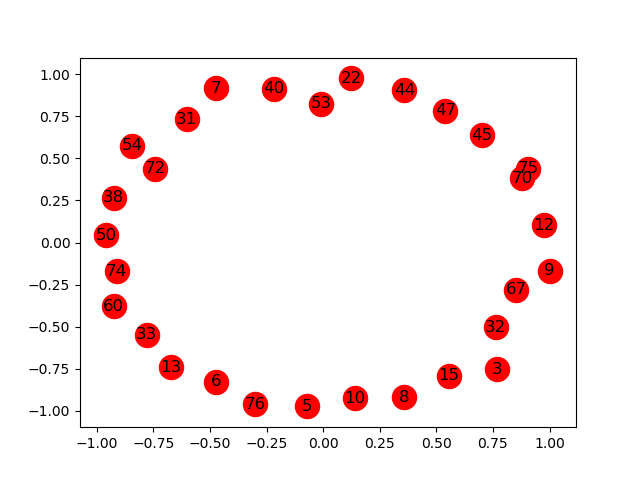

In [3]:
nx.draw_networkx(G)

In [4]:
nx.number_connected_components(G) 

28

In [6]:
list(nx.connected_components(G))

[{3},
 {5},
 {6},
 {7},
 {8},
 {9},
 {10},
 {12},
 {13},
 {15},
 {22},
 {31},
 {32},
 {33},
 {38},
 {40},
 {44},
 {45},
 {47},
 {50},
 {53},
 {54},
 {60},
 {67},
 {70, 75},
 {72},
 {74},
 {76}]

In [8]:
#degree centrality
#(1 significa que o vértice está ligado a todos os demais vértices do grafo, 0 se não está ligado a qualquer vértice)
#pressuposto: os vértices importantes têm muitas ligações
dict_dc = nx.degree_centrality(G)
list_dc = list (dict_dc.values())
max_dc_value = max(list_dc)
max_dc_key = [k for k, v in dict_dc.items() if v == max_dc_value]
#print(dict_dc)
print('max degree centrality:', max_dc_value)
print('vértice com max dc:', max_dc_key)

max degree centrality: 0.03571428571428571
vértice com max dc: [70, 75]


In [9]:
#eigenvalue centrality
dict_ec = nx.eigenvector_centrality(G, max_iter=500, tol=1e-06, nstart=None, weight='weight')
list_ec = list (dict_ec.values())
max_ec_value = max(list_ec)
max_ec_key = [k for k, v in dict_ec.items() if v == max_ec_value]
#print(dict_ec)
print('max eigenvalue centrality:', max_ec_value)
print('vértice com max ec:', max_ec_key)

max eigenvalue centrality: 0.7071067811822066
vértice com max ec: [70, 75]


In [10]:
#betweenness centrality
#pressuposto: os vértices importantes ligam outros vértices
#um vértice tem betweeness centrality elevada se aparece em muitos caminhos curtos dos outros vértices
dict_bc = nx.betweenness_centrality(GPI, k=None, weight='weight', endpoints=False)
list_bc = list (dict_bc.values())
max_bc_value = max(list_bc)
max_bc_key = [k for k, v in dict_bc.items() if v == max_bc_value]
#print(dict_bc)
print('max betweenness centrality:', max_bc_value)
print('vértice com max bc:', max_bc_key)

max betweenness centrality: 0.0
vértice com max bc: [3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 13.0, 15.0, 22.0, 31.0, 32.0, 33.0, 38.0, 40.0, 44.0, 45.0, 47.0, 50.0, 53.0, 54.0, 60.0, 67.0, 70.0, 72.0, 74.0, 75.0, 76.0]
